In [26]:
from tensorflow.keras.datasets import mnist
import matplotlib

In [27]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

In [28]:
x_train = x_train/255
x_test = x_test/255

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
y_train= to_categorical(y_train, num_classes=10)

In [31]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Text(0.5, 1.0, 'image label = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]')

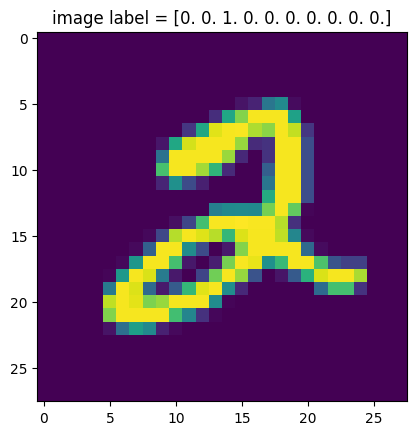

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f"image label = {y_train[5]}")

In [32]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [33]:
y_train= to_categorical(y_train, num_classes=10)

In [34]:
y_test= to_categorical(y_test, num_classes=10)

# Dense = Fully Feed forward network

In [35]:
model = Sequential([
    Flatten(input_shape =(28,28)), #input layer neuron 784
    Dense(5,activation = 'relu'), #hidden layer 
    Dense(10, activation = 'softmax') #output layer 10 neuron
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 5)                 3925      
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fif(x_train, y_train, epochs=5, batch_size=32, verbose=2)

AttributeError: 'Sequential' object has no attribute 'fif'

In [38]:
model.evaluate(x_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [39]:
model.save('mnist.h5')

In [40]:
model.get_weights()

[array([[-0.01771817, -0.05384657,  0.02899608, -0.03262835,  0.07543518],
        [ 0.01888511,  0.06793316,  0.02326259,  0.01858621,  0.03222271],
        [-0.03546465, -0.05989684,  0.0089383 , -0.00880374,  0.08185534],
        ...,
        [-0.00987422, -0.01830281, -0.02131219, -0.03873912,  0.0870818 ],
        [-0.04312818, -0.08367423, -0.00070043, -0.08473996,  0.02667912],
        [-0.04407571, -0.06195617, -0.0204671 ,  0.00636045,  0.00512529]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.06912839,  0.58421105,  0.20520973, -0.0496282 , -0.2035904 ,
         -0.5649842 , -0.03691572,  0.25277525, -0.02039695,  0.11057401],
        [ 0.46206707,  0.58275515, -0.47022372,  0.57106906,  0.58923155,
         -0.54451287,  0.2538051 ,  0.25692964,  0.09743619,  0.2019813 ],
        [ 0.48085624,  0.6027128 ,  0.4909386 ,  0.5738813 ,  0.02387744,
          0.5281361 ,  0.470349  ,  0.1976211 , -0.13018185,  0.26520103],
        [-0.51481557,

# Try do deal with complex neural network
           Input Layer
                 |
         -------------------
         |                 |
     Hidden Layer 1    Hidden Layer 2
         |                  /
         |                 /
         |                /
        H1a              /
          \             /
           \           /
            \         /
             \       /
              \     /
               \   /
                \ /
             Concatenate


In [41]:
from keras.models import Model
from keras.layers import Input, Flatten, Dense, concatenate

In [47]:
input_layer = Input(shape= (28,28))
flatten= Flatten(input_shape=(28,28)(input_layer))

<>:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
/var/folders/8h/r_3bcb_177x5qbpxcsfynp_80000gn/T/ipykernel_7201/3853797872.py:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  flatten= Flatten(input_shape=(28,28)(input_layer))
/var/folders/8h/r_3bcb_177x5qbpxcsfynp_80000gn/T/ipykernel_7201/3853797872.py:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  flatten= Flatten(input_shape=(28,28)(input_layer))
/var/folders/8h/r_3bcb_177x5qbpxcsfynp_80000gn/T/ipykernel_7201/3853797872.py:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  flatten= Flatten(input_shape=(28,28)(input_layer))
/var/folders/8h/r_3bcb_177x5qbpxcsfynp_80000gn/T/ipykernel_7201/3853797872.py:2: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  flatten= Flatten(input_shape=(28,28)(input_layer))


TypeError: 'tuple' object is not callable

In [43]:
hidden1= Dense(128, activation ='relu')(input_layer)
hidden2= Dense(168, activation ='relu')(input_layer)
hidden11= Dense(64, activation ='relu')(hidden1)
merge = concatenate([hidden11, hidden2])
output_layer= Dense(10, activation='softmax')(merge)

In [44]:
model = Model(inputs =input_layer, outputs= output_layer)

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 28, 128)      3712        ['input_1[0][0]']                
                                                                                                  
 dense_8 (Dense)                (None, 28, 64)       8256        ['dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 28, 168)      4872        ['input_1[0][0]']                
                                                                                              

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'